# Machine Learning Engineer Nanodegree
# Capstone
# Project: To find an Optimum Machine Learning Model for Human Activity        Recognition with Smartphone Sensor Data

This is the Capstone for MLND.
Our purpose is to recognize human activity based on the sensor data from smartphones and to find an optimum model with can predict these activities with high degree of accuracy.

In [1]:
# Import the Necessary Libraries

import time, pickle
import numpy as np
from numpy import array, argmax
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import the Data set
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

# Merge the data into a single file as 'data'(later we will use train_test_split for splitting train and test set)
data = pd.concat([train, test])

# Use pickle to store dataset so we can import it later directly
with open('data.pickle','wb') as f:
    pickle.dump(data, f)

# Data Pre-processing:

Before feeding the data into our machine learning algorithms, we should preprocess the data. For this we will perform the following steps:
- Removing any Missing or NA values from the dataset.
- Rescaling the dataset
- Normlizing the dataset

However, the dataset we are using doesnot contain any missing values. Also, for the dataset features are already Features are normalized and bounded within [-1,1]. So the abve mentioned steps are not required.

# Data Preperation:

Out of all 563 fetures of our dataset, Activity and Subject are catgorical and the other 561 features are continuous.
Just by looking at the dataset we can say that ***'subject'*** is not a relevant feature for predicting the Activity. Subjects are the people who have undertaken the experiment for capturing our dataset and each one of 30 subjects have performed the same six activities. Lets visualize the distribution of activity performed by the subjects for all 6 activities to see to see if there is a relation between subject feature and the activity feature. 

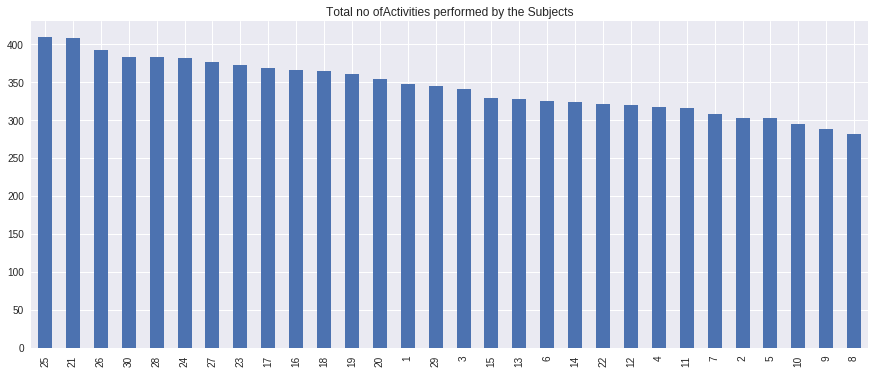

In [2]:
data['subject'].value_counts().plot(kind='bar',figsize=(15,6), title='Total no ofActivities performed by the Subjects')

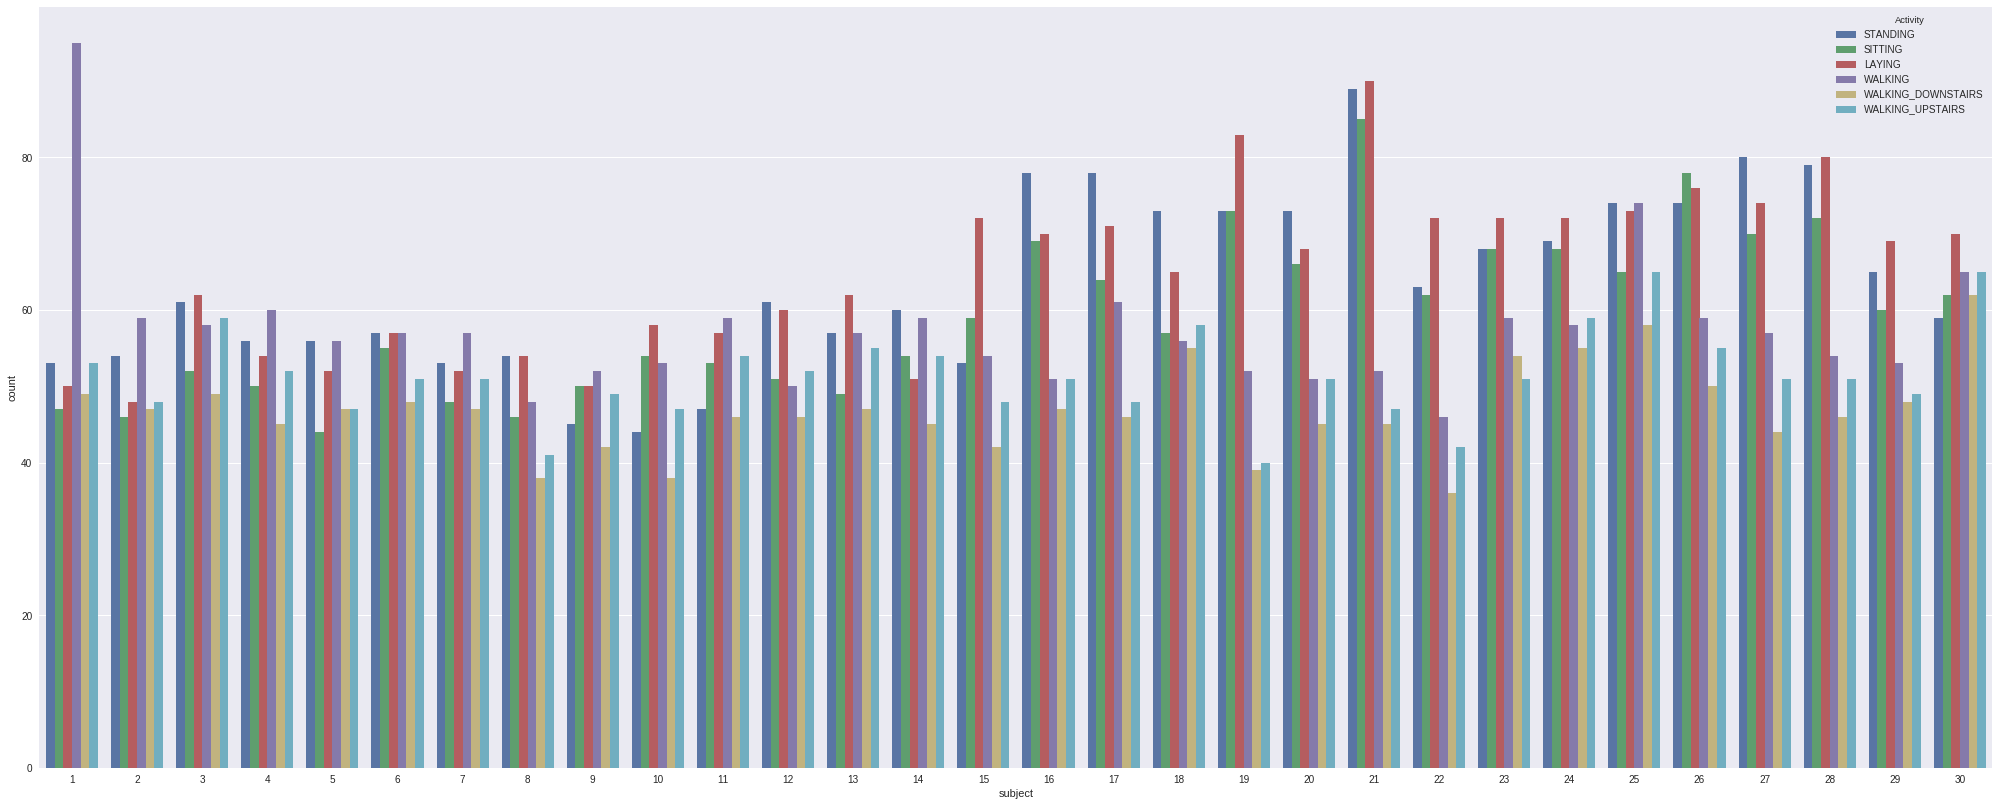

In [3]:
fig = plt.figure(figsize=(35,14))
ax = sns.countplot(hue ="Activity", x ="subject", data= data)

As we can see above acivities performed by the subjects are similar. Except a few cases(eg: subject 1), LAYING being the maximum no of activity performed by all users. So we can remove the 'subject' feature from our dataset.

In [4]:
# Drop the column 'subject'
data = data.drop(['subject'], axis = 1)   # No of column decreases by 1 (562 Columns)
label = data['Activity']
data = data.drop(['Activity'], axis = 1)  # 561 Columns

From our dataset we can see that the 'Activity' feature is non-numeric. ML algorthms expect the input data to be numeric, so we shall convert the 'Activity' feature into something Numerical. Let us use ***'Label Encoder'*** for this purpose.

In [5]:
# Use Label Encoder and transform 'Activity' into numerical catagories
LE = LabelEncoder()
target = LE.fit_transform(label)

**Shuffle and Split Data:**
As our test data is now preprocessed and the target is seperated and encoded as numerical catagories. Let us proceed with splitting the dataset as training and testing set using train_test_split taking test_size as 30% of the total dataset and considering a random_state for recreation purpose.

In [6]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 18)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7209 samples.
Testing set has 3090 samples.


## One Hot Encoding

In [7]:
# One Hot Encode y_test and save as y_true

integer_encoded = y_test
print(integer_encoded)
print(integer_encoded.shape)

# One Hot Encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(y_test), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
print(onehot_encoded.shape)
y_true = onehot_encoded

[3 2 3 ..., 3 0 1]
(3090,)
[[ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 ..., 
 [ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]]
(3090, 6)


In [8]:
# Use pickle to store dataset so we can import it later directly
with open('X_train.pickle','wb') as f:
    pickle.dump(X_train, f)
with open('X_test.pickle','wb') as f:
    pickle.dump(X_test, f)
with open('y_train.pickle','wb') as f:
    pickle.dump(y_train, f)
with open('y_test.pickle','wb') as f:
    pickle.dump(y_test, f)
with open('y_true.pickle','wb') as f:
    pickle.dump(y_true, f)